In [68]:
!pip install kaggle


In [69]:
!pip install kagglehub


## Importing Libraries

In [70]:
import kagglehub

path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Dataset downloaded to:", path)

Using Colab cache for faster access to the 'new-plant-diseases-dataset' dataset.
Dataset downloaded to: /kaggle/input/new-plant-diseases-dataset


In [71]:
import os

base = "/kaggle/input/new-plant-diseases-dataset"
os.listdir(base)


['New Plant Diseases Dataset(Augmented)',
 'new plant diseases dataset(augmented)',
 'test']

In [72]:

inner = base + "/New Plant Diseases Dataset(Augmented)"
print(os.listdir(inner))


['New Plant Diseases Dataset(Augmented)']


In [73]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Data Prepocessing



## Training Image Preprocessing

In [74]:
base = path + "/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"

In [75]:
img_size = (128, 128)
batch_size = 32


In [76]:
train_dir = base + "/train"
train_set = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)

Found 70295 files belonging to 38 classes.


In [77]:
for images, labels in train_set.take(1):
    print(images.shape)


(32, 128, 128, 3)


### validation image preprocessing

In [78]:
valid_dir = base + "/valid"
valid_set = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)

Found 17572 files belonging to 38 classes.


In [79]:
test_dir  = path + "/test/test"
test_set = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels=None,
    label_mode=None,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False
)


Found 33 files.


## structure of training set

In [80]:
train_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [81]:
for x,y in train_set:
  print(x)
  print(y)
  break

tf.Tensor(
[[[[115.   117.   138.  ]
   [113.   115.   136.  ]
   [115.75 117.75 138.75]
   ...
   [161.25 168.25 187.25]
   [161.5  168.5  187.5 ]
   [161.25 168.25 187.25]]

  [[114.   116.   137.  ]
   [113.75 115.75 136.75]
   [116.5  118.5  139.5 ]
   ...
   [166.25 173.25 192.25]
   [161.   168.   187.  ]
   [161.25 168.25 187.25]]

  [[112.5  114.5  135.5 ]
   [111.25 113.25 134.25]
   [116.   118.   139.  ]
   ...
   [163.75 170.75 189.75]
   [160.25 167.25 186.25]
   [162.75 169.75 188.75]]

  ...

  [[ 83.75  84.75 104.75]
   [ 94.75  95.75 115.75]
   [ 88.5   89.5  109.5 ]
   ...
   [130.25 137.25 156.25]
   [128.25 135.25 154.25]
   [127.75 134.75 153.75]]

  [[ 84.25  85.25 105.25]
   [ 99.5  100.5  120.5 ]
   [ 91.5   92.5  112.5 ]
   ...
   [128.5  135.5  154.5 ]
   [127.5  134.5  153.5 ]
   [125.75 132.75 151.75]]

  [[ 85.    86.   106.  ]
   [ 86.5   87.5  107.5 ]
   [ 86.75  87.75 107.75]
   ...
   [128.   135.   154.  ]
   [129.   136.   155.  ]
   [128.   135.   15

# building model

In [82]:
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D,Flatten,Dropout,Dense
from tensorflow.keras.models import Sequential

In [83]:
model = Sequential()




# building convolution model



In [84]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [85]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [86]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [87]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [88]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [89]:
model.add(Dropout(0.25)) # avoid overfitting

In [90]:
model.add(Flatten())
print(model.output_shape)


(None, 2048)


In [91]:
model.add(Dense(units=1500, activation='relu'))
model.add(Dropout(0.4))

In [92]:
#output layer
model.add(Dense(units=38,activation='softmax'))

#Compiling model

In [93]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [94]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

# model training

In [95]:
training_history = model.fit(x= train_set,validation_data=valid_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 146s 63ms/step - accuracy: 0.4227 - loss: 2.0371 - val_accuracy: 0.8445 - val_loss: 0.4874
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 192s 61ms/step - accuracy: 0.8542 - loss: 0.4644 - val_accuracy: 0.9064 - val_loss: 0.2883
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 134s 61ms/step - accuracy: 0.9114 - loss: 0.2715 - val_accuracy: 0.9245 - val_loss: 0.2289
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 141s 60ms/step - accuracy: 0.9416 - loss: 0.1797 - val_accuracy: 0.9348 - val_loss: 0.2014
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 133s 60ms/step - accuracy: 0.9546 - loss: 0.1407 - val_accuracy: 0.9371 - val_loss: 0.1952
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 132s 60ms/step - accuracy: 0.9646 - loss: 0.1078 - val_accuracy: 0.9521 - val_loss: 0.1489
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 134s 61ms/step - accuracy: 0.9700 - loss: 0.0903 - val_accuracy: 0.9485 - val_loss: 0.1728
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 133s 61ms/step - accuracy: 

#Evaluate Model

In [96]:
train_loss, train_acc = model.evaluate(train_set)
val_loss, val_acc = model.evaluate(valid_set)

print("Training Accuracy:", train_acc)
print("Validation Accuracy:", val_acc)


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 62s 28ms/step - accuracy: 0.9893 - loss: 0.0309
550/550 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.9621 - loss: 0.1271
Training Accuracy: 0.9905683398246765
Validation Accuracy: 0.9639768004417419


#Save Model

In [97]:
model.save("trained_model.keras")
550/550 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.9621 - loss: 0.1271
Training Accuracy: 0.9905683398246765
Validation Accuracy: 0.9639768004417419


In [98]:
training_history.history

{'accuracy': [0.6272138953208923,
  0.8719823360443115,
  0.9196386933326721,
  0.9437655806541443,
  0.9576357007026672,
  0.9665409922599792,
  0.9725869297981262,
  0.9762429594993591,
  0.9789316654205322,
  0.9829717874526978],
 'loss': [1.2611342668533325,
  0.40659376978874207,
  0.24931293725967407,
  0.1715117245912552,
  0.12898044288158417,
  0.1025879755616188,
  0.08403845131397247,
  0.07282461225986481,
  0.06544385105371475,
  0.054062679409980774],
 'val_accuracy': [0.8445253968238831,
  0.9063851833343506,
  0.9244821071624756,
  0.9347826242446899,
  0.9371158480644226,
  0.9521397948265076,
  0.9484975934028625,
  0.9669929146766663,
  0.9640905857086182,
  0.9639768004417419],
 'val_loss': [0.4873514771461487,
  0.28828591108322144,
  0.22889694571495056,
  0.2014329731464386,
  0.19515205919742584,
  0.1489197015762329,
  0.17278234660625458,
  0.10916718095541,
  0.11752757430076599,
  0.12446758151054382]}

In [99]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

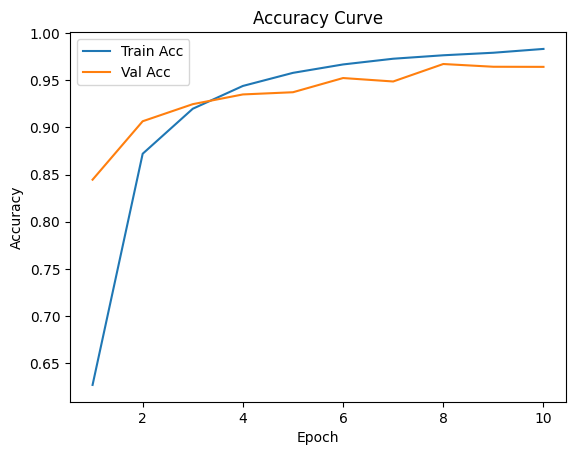

In [100]:
epochs = [i for i in range(1,11)]
plt.plot(epochs, training_history.history['accuracy'], label="Train Acc")
plt.plot(epochs, training_history.history['val_accuracy'], label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()
plt.show()


#Classification Report  and Confusion Matrix

In [101]:
class_names = valid_set.class_names
class_names



['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [111]:
import json

# If you have 'class_names' variable already from train_set.class_names:
# class_names = train_set.class_names

# Example: if class_names already exists in notebook, just save it:
with open("class_names.json", "w") as f:
    json.dump(class_names, f, indent=2)

print("Saved class_names.json with", len(class_names), "classes.")


Saved class_names.json with 38 classes.


In [102]:
!find /content -maxdepth 5 -type d -print


/content
/content/.config
/content/.config/logs
/content/.config/logs/2025.11.05
/content/.config/configurations
/content/sample_data


In [103]:
test_set = tf.keras.utils.image_dataset_from_directory(
   valid_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [104]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step


(array([[1.0000000e+00, 1.6929494e-11, 4.4874735e-14, ..., 2.7279861e-21,
         4.6982320e-18, 5.7663971e-17],
        [9.9999821e-01, 5.6897829e-08, 3.2773945e-10, ..., 8.6090252e-15,
         2.9203799e-13, 3.8530417e-13],
        [1.0000000e+00, 1.7473815e-12, 4.0630099e-15, ..., 8.6323547e-23,
         8.4500583e-17, 6.4510162e-17],
        ...,
        [5.6227917e-10, 1.5359525e-13, 1.6243661e-10, ..., 1.6357100e-11,
         4.2197851e-13, 9.9996376e-01],
        [7.0153001e-11, 7.6093767e-14, 2.8495940e-11, ..., 7.8260098e-12,
         1.5157124e-12, 1.0000000e+00],
        [8.6971993e-16, 3.6037579e-17, 1.0460221e-14, ..., 4.1137238e-16,
         2.7830532e-13, 9.9999952e-01]], dtype=float32),
 (17572, 38))

In [105]:
predicted_categories = tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [106]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [107]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [108]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_true,predicted_categories,target_names=class_names))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.92      0.94       504
                                 Apple___Black_rot       0.93      1.00      0.96       497
                          Apple___Cedar_apple_rust       0.99      0.95      0.97       440
                                   Apple___healthy       0.97      0.97      0.97       502
                               Blueberry___healthy       0.94      0.99      0.96       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.94      0.98      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.85      0.90       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.90      0.99      0.

In [109]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[464,  10,   0, ...,   0,   0,   0],
       [  0, 496,   0, ...,   0,   0,   0],
       [  0,   0, 417, ...,   2,   0,   1],
       ...,
       [  0,   0,   0, ..., 489,   0,   0],
       [  0,   0,   0, ...,   0, 439,   0],
       [  0,   0,   0, ...,   0,   0, 474]])

#Confusion Matrix Plot

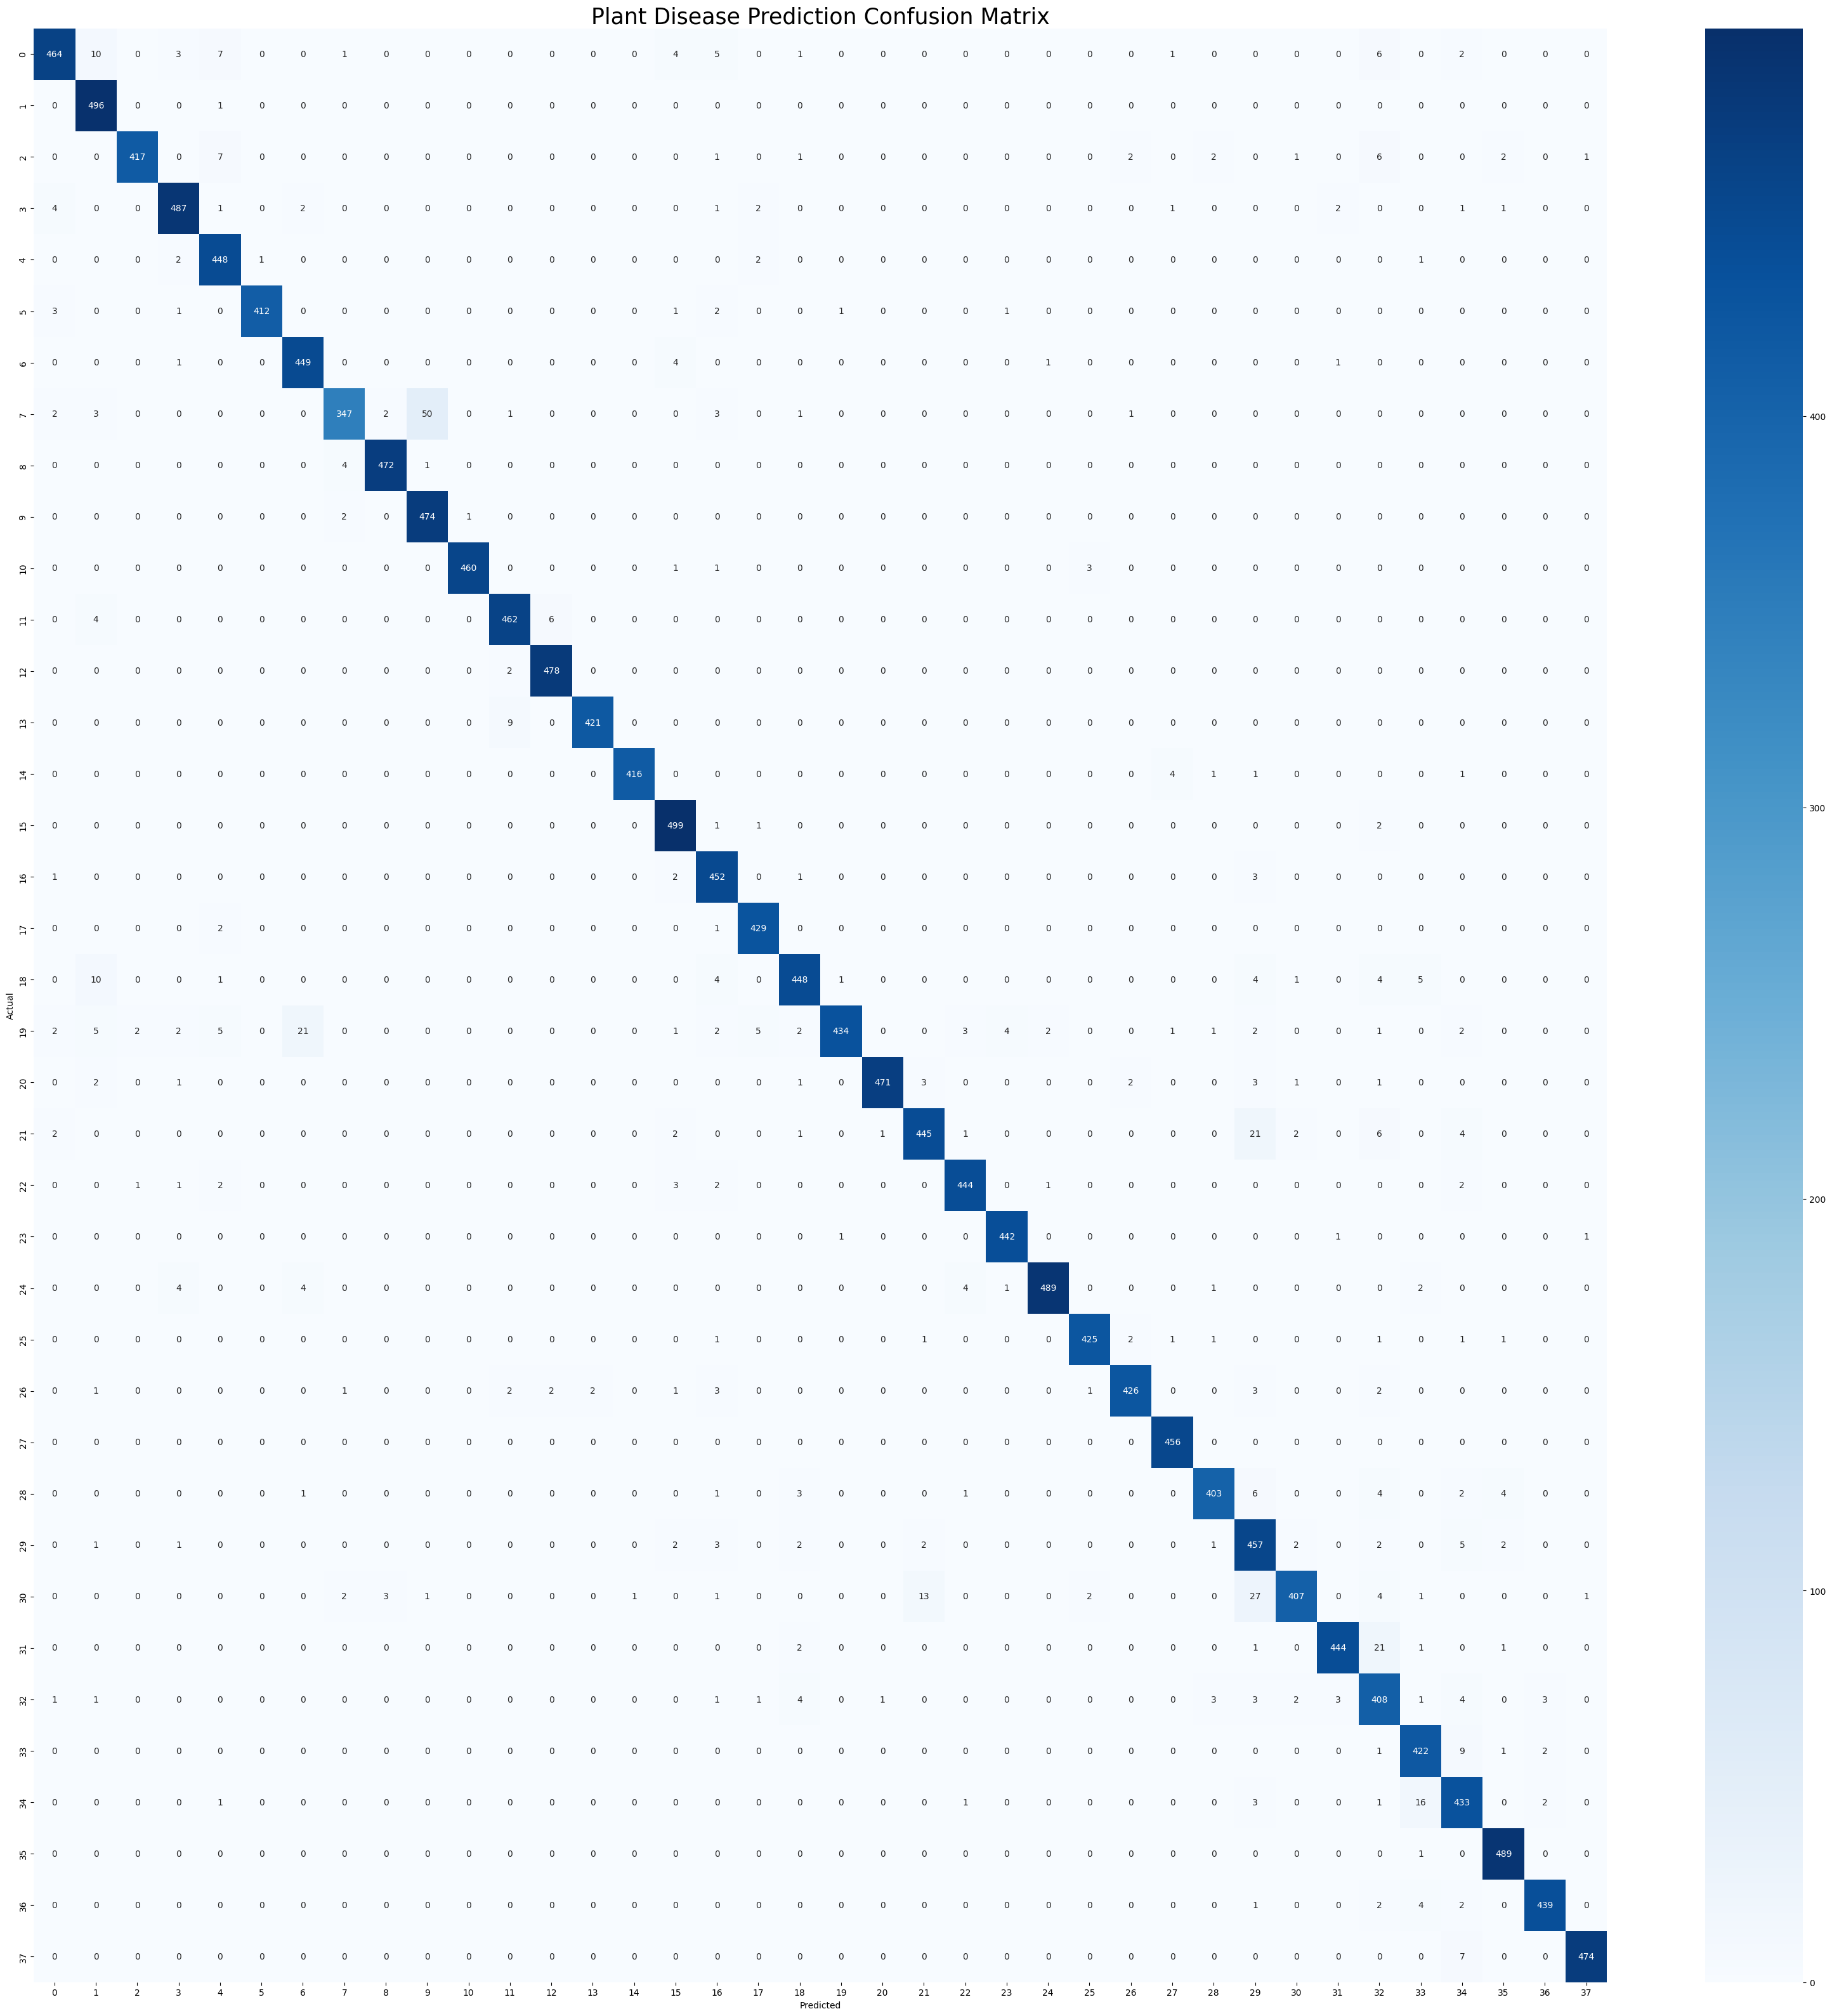

In [110]:
plt.figure(figsize=(40,40))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Plant Disease Prediction Confusion Matrix", fontsize=25)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
